<a href="https://colab.research.google.com/github/mingyu1021/AI-class/blob/main/4week/4week_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree

모델 정확도: 0.5163


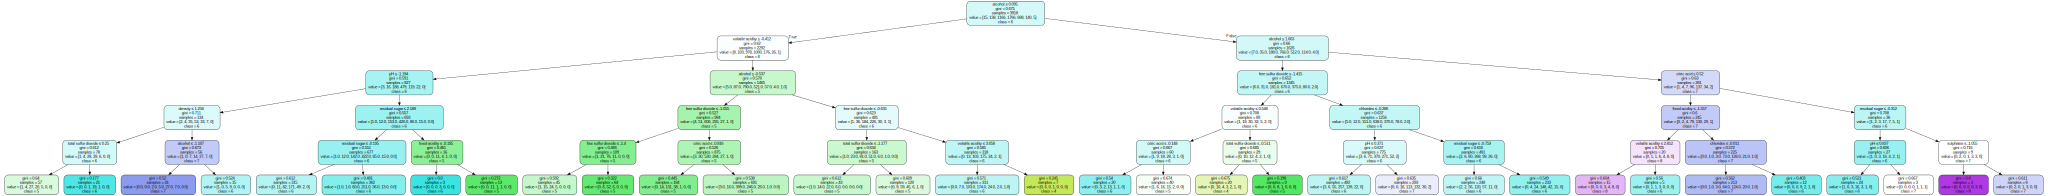

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import graphviz
from IPython.display import display # Jupyter Notebook/Colab에서 그래프를 바로 출력하기 위함

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/AI-class/winequality-white.csv', delimiter=';')

# 2. 독립 변수 (X)와 종속 변수 (y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 3. 데이터 분할
# 훈련 데이터 80%, 테스트 데이터 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 데이터 스케일링 (올바른 순서)
scaler = StandardScaler()

# 훈련 데이터에 fit_transform 적용
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터에는 transform만 적용
X_test_scaled = scaler.transform(X_test)

# 5. 모델 학습
# 스케일링된 훈련 데이터로 모델 학습
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train_scaled, y_train)

# 6. 예측 및 평가
# 스케일링된 테스트 데이터로 예측
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

# 7. 디시전 트리 시각화
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,  # 원본 X의 컬럼 이름을 사용
    class_names=[str(c) for c in model.classes_],
    filled=True,
    rounded=True,
    special_characters=True
)

# Graphviz Source 객체 생성 및 출력
graph = graphviz.Source(dot_data)
display(graph)

Random forest


모델 정확도: 0.6908


/tmp/ipython-input-2922321538.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


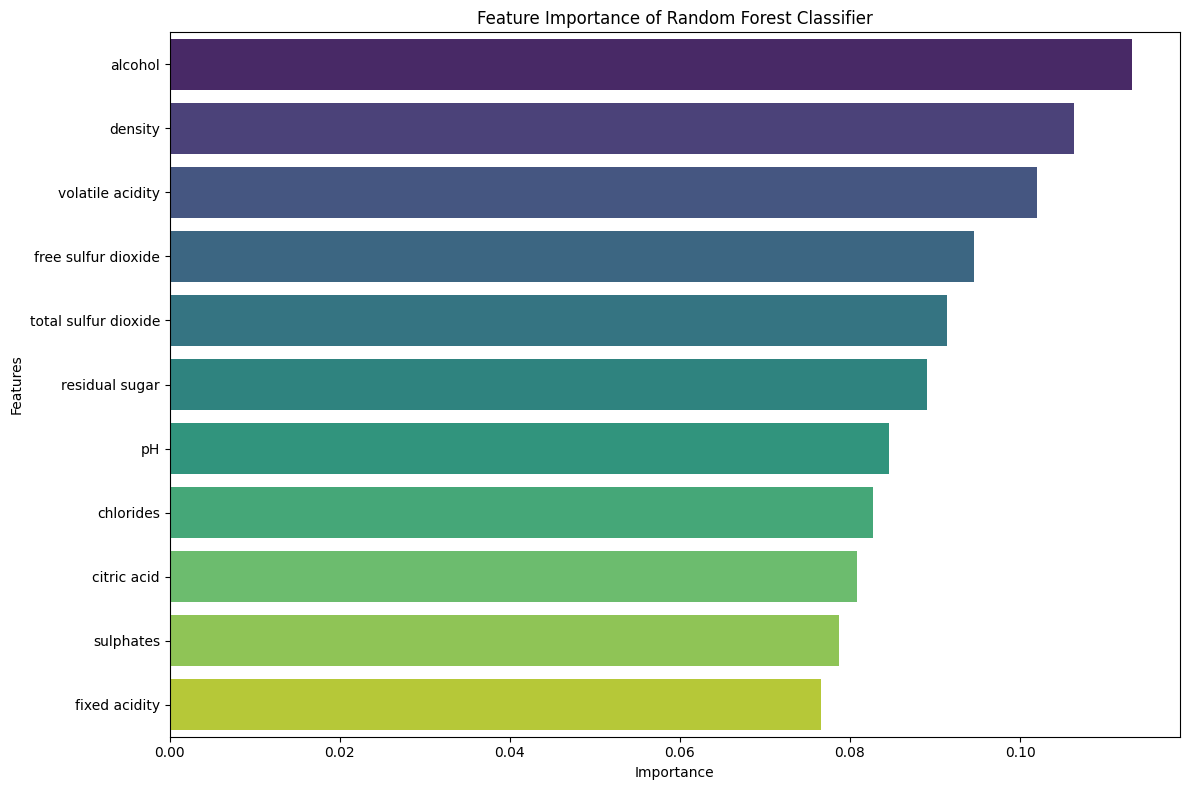

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/AI-class/winequality-white.csv', delimiter=';')

# 2. 독립 변수 (X)와 종속 변수 (y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 3. 데이터 분할
# 훈련 데이터 80%, 테스트 데이터 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. 모델 학습
# RandomForestClassifier 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. 예측 및 평가
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 모델 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"\n모델 정확도: {accuracy:.4f}")

# Feature Importance 추출 및 시각화
# 모델에서 피처 중요도(feature importance)를 추출
importances = model.feature_importances_
feature_names = X.columns

# 중요도를 데이터프레임으로 변환하여 정렬
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance of Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

KNN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/AI-class/winequality-white.csv', delimiter=';')

# 2. 독립 변수 (X)와 종속 변수 (y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 3. 데이터 분할
# 훈련 데이터 80%, 테스트 데이터 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. 모델 학습 (KNN)
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")



모델 정확도: 0.5429


Logistic Regression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/AI-class/winequality-white.csv', delimiter=';')

# 2. 독립 변수 (X)와 종속 변수 (y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 데이터 스케일링
# 로지스틱 회귀는 스케일링이 중요합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 모델 학습
# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 6. 예측 및 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

# 7. 기울기(coef_)와 절편(intercept_) 출력
# 멀티클래스이므로 각 클래스에 대한 기울기/절편이 존재
print("\n모델의 기울기(Coefficient):")
print(model.coef_)
print("\n모델의 절편(Intercept):")
print(model.intercept_)

모델 정확도: 0.5316

모델의 기울기(Coefficient):
[[ 0.79326449  0.53231419 -0.00863581 -0.34600414  0.51091977  0.47229667
  -0.22830646 -0.09584739  0.27770677 -0.32832087 -0.43042432]
 [-0.35707719  0.63938632  0.00892701 -1.23811009  0.23958428 -0.78414659
  -0.03856285  1.23983666 -0.43726709 -0.09471884 -0.59175943]
 [-0.496341    0.26186895  0.0081019  -0.51420803  0.21545654 -0.24638827
   0.21122426  0.67157658 -0.49251758 -0.07793801 -0.88882873]
 [-0.61837474 -0.33920297  0.01461334 -0.24815891  0.27231941 -0.08526451
   0.10264684  0.69103552 -0.47431288  0.05265862  0.23386071]
 [-0.16085575 -0.52012914 -0.10464967  0.92134149 -0.04849541  0.02309749
   0.07176469 -0.98478374 -0.03851827  0.27630237  0.16431039]
 [-0.23697177 -0.46971777 -0.04321698  1.11240693  0.23617655  0.27613108
   0.11509882 -0.92726153 -0.03800773  0.21957136  0.62368104]
 [ 1.07635596 -0.10451959  0.12486022  0.31273276 -1.42596114  0.34427413
  -0.2338653  -0.5945561   1.20291677 -0.04755462  0.88916033]]

모

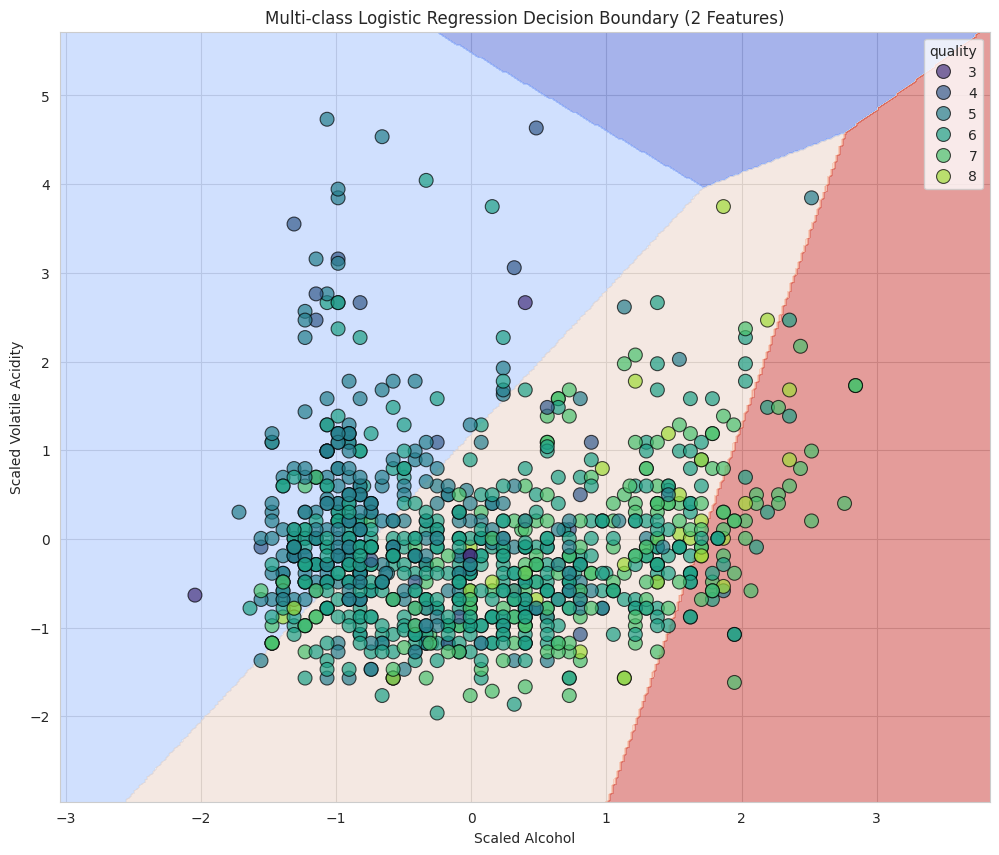

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

# Plotting style 설정
sns.set_style('whitegrid')

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/AI-class/winequality-white.csv', delimiter=';')


# 2. 독립 변수 (X)와 종속 변수 (y) 분리
X = df.drop('quality', axis=1)
y = df['quality']

# 3. 시각화를 위한 2개 특성 모델 학습
X_2d = df[['alcohol', 'volatile acidity']]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

model_2d = LogisticRegression(random_state=42)
model_2d.fit(X_train_2d_scaled, y_train_2d)

# 4. 결정 경계 시각화
x_min, x_max = X_test_2d_scaled[:, 0].min() - 1, X_test_2d_scaled[:, 0].max() + 1
y_min, y_max = X_test_2d_scaled[:, 1].min() - 1, X_test_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 10))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

sns.scatterplot(x=X_test_2d_scaled[:, 0], y=X_test_2d_scaled[:, 1], hue=y_test_2d,
                palette=sns.color_palette("viridis", n_colors=len(np.unique(y_test_2d))),
                edgecolor='k', s=100, alpha=0.7)

plt.title('Multi-class Logistic Regression Decision Boundary (2 Features)')
plt.xlabel('Scaled Alcohol')
plt.ylabel('Scaled Volatile Acidity')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()